In [13]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

df_raw = pd.read_csv('airbnb.csv')

In [14]:
# Airbnb Hosts
# keep address[city, state, country], price, bathrooms, beds, guests, bedrooms

# *== Reducing the dimentiality of the dataset ==* //
df = df_raw[['address', 'price', 'bathrooms', 'beds', 'guests', 'bedrooms']]

In [15]:
# Removed rows in the address which 
df = df_raw[['address', 'price', 'bathrooms', 'beds', 'guests', 'bedrooms']]

for index, row in df.iterrows():
	commas = 0
	for char in row['address']:
		if char == ',':
			commas += 1
	if commas != 2:
		df = df.drop(index)

In [16]:
# Split the address column into city, state and country columns and dropped the address column
df[['city', 'state/province', 'country']] = df['address'].str.split(", ",expand=True)
df = df.drop(['address'], axis=1)
df = df.dropna(subset=['price'])
# df

In [17]:
list_of_countries = set()

for index, row in df.iterrows():
	list_of_countries.add(row['country'])
	# for char in row['address']:
	# 	if char == ',':
	# 		commas += 1
	# if commas != 2:
	# 	df = df.drop(index)
# print(list_of_countries)


In [18]:
currency_conversion_to_usd = {
    'Puerto Rico': 1.0,  # USD to USD (Puerto Rico uses USD)
    'Maldives': 0.065,  # MVR to USD
    'Åland Islands': 1.1,  # EUR to USD (Åland Islands use Euro)
    'Poland': 0.26,  # PLN to USD
    'Albania': 0.0092,  # ALL to USD
    'Hungary': 0.0034,  # HUF to USD
    'France': 1.1,  # EUR to USD
    'Costa Rica': 0.0017,  # CRC to USD
    'Saudi Arabia': 0.27,  # SAR to USD
    'Serbia': 0.0092,  # RSD to USD
    'Egypt': 0.032,  # EGP to USD
    'Bolivia': 0.14,  # BOB to USD
    'Kyrgyzstan': 0.011,  # KGS to USD
    'India': 0.012,  # INR to USD
    'Sweden': 0.11,  # SEK to USD
    'Sri Lanka': 0.0031,  # LKR to USD
    'Greece': 1.1,  # EUR to USD
    'Fiji': 0.45,  # FJD to USD
    'Congo': 0.0016,  # CDF to USD
    'Ukraine': 0.027,  # UAH to USD
    'Croatia': 0.16,  # HRK to USD
    'Armenia': 0.0025,  # AMD to USD
    'Argentina': 0.010,  # ARS to USD
    'Kazakhstan': 0.0023,  # KZT to USD
    'New Zealand': 0.61,  # NZD to USD
    'Kenya': 0.0071,  # KES to USD
    'Cyprus': 1.1,  # EUR to USD
    'Romania': 0.22,  # RON to USD
    'Germany': 1.1,  # EUR to USD
    'Uruguay': 0.026,  # UYU to USD
    'Portugal': 1.1,  # EUR to USD
    'Mexico': 0.053,  # MXN to USD
    'Finland': 1.1,  # EUR to USD
    'Malaysia': 0.22,  # MYR to USD
    'Canada': 0.75,  # CAD to USD
    'Philippines': 0.018,  # PHP to USD
    'Seychelles': 0.074,  # SCR to USD
    'United Kingdom': 1.3,  # GBP to USD
    'Vietnam': 0.000043,  # VND to USD
    'Panama': 1.0,  # USD to USD (Panama uses USD)
    'Oman': 2.60,  # OMR to USD
    'Svalbard & Jan Mayen': 0.10,  # NOK to USD (Norwegian Krone)
    'Taiwan': 0.032,  # TWD to USD
    'Italy': 1.1,  # EUR to USD
    'Guadeloupe': 1.1,  # EUR to USD
    'South Korea': 0.00084,  # KRW to USD
    'Malta': 1.1,  # EUR to USD
    'United States': 1.0,  # USD to USD
    'Mauritius': 0.023,  # MUR to USD
    'Jamaica': 0.0065,  # JMD to USD
    'St Martin': 1.1,  # EUR to USD (French side)
    'Hong Kong': 0.13,  # HKD to USD
    'Iceland': 0.0073,  # ISK to USD
    'Belgium': 1.1,  # EUR to USD
    'Norway': 0.10,  # NOK to USD
    'Turkey': 0.036,  # TRY to USD
    'Australia': 0.65,  # AUD to USD
    'Spain': 1.1,  # EUR to USD
    'Slovenia': 1.1,  # EUR to USD
    'Tunisia': 0.32,  # TND to USD
    'Brazil': 0.19,  # BRL to USD
    'Latvia': 1.1,  # EUR to USD
    'Honduras': 0.041,  # HNL to USD
    'Czechia': 0.045,  # CZK to USD
    'United Arab Emirates': 0.27,  # AED to USD
    'Belize': 0.50,  # BZD to USD
    'Nicaragua': 0.027,  # NIO to USD
    'French Polynesia': 0.0091,  # XPF to USD
    'Lebanon': 0.000066,  # LBP to USD
    'Chile': 0.0013,  # CLP to USD
    'Lithuania': 1.1,  # EUR to USD
    'Madagascar': 0.00022,  # MGA to USD
    'Rwanda': 0.00085,  # RWF to USD
    'Cayman Islands': 1.2,  # KYD to USD
    'Jordan': 1.41,  # JOD to USD
    'Cuba': 0.038,  # CUP to USD
    'Ireland': 1.1,  # EUR to USD
    'Greenland': 0.15,  # DKK to USD
    'Uganda': 0.00027,  # UGX to USD
    'Netherlands': 1.1,  # EUR to USD
    'Pakistan': 0.0036,  # PKR to USD
    'Vanuatu': 0.0084,  # VUV to USD
    'Mongolia': 0.00034,  # MNT to USD
    'Morocco': 0.10,  # MAD to USD
    'Indonesia': 0.000066,  # IDR to USD
    'Switzerland': 1.1,  # CHF to USD
    'Bulgaria': 0.57,  # BGN to USD
    'Thailand': 0.032,  # THB to USD
    'Bosnia & Herzegovina': 0.57,  # BAM to USD
    'Myanmar': 0.00047,  # MMK to USD
    'Kuwait': 3.29,  # KWD to USD
    'Cambodia': 0.00024,  # KHR to USD
    'Bangladesh': 0.012,  # BDT to USD
    'Bahamas': 1.0,  # BSD to USD
    'Namibia': 0.071,  # NAD to USD
    'South Africa': 0.071,  # ZAR to USD
    'Montenegro': 1.1,  # EUR to USD
    'Georgia': 0.37,  # GEL to USD
    'Colombia': 0.00025,  # COP to USD
    'Tanzania': 0.00043,  # TZS to USD
    'Estonia': 1.1,  # EUR to USD
    'Nepal': 0.0075,  # NPR to USD
    'Slovakia': 1.1,  # EUR to USD
    'Austria': 1.1,  # EUR to USD
    'Israel': 0.28,  # ILS to USD
    'Japan': 0.009,  # JPY to USD
    'Peru': 0.27,  # PEN to USD
    'Guatemala': 0.13,  # GTQ to USD
    'Brunei': 0.74,  # BND to USD
    'Uzbekistan': 0.000082,  # UZS to USD
    'Denmark': 0.15,  # DKK to USD
}
currency_conversion_to_usd2 = {
    'Albania': 0.0092, 'Argentina': 0.010, 'Armenia': 0.0025, 'Australia': 0.65, 'Austria': 1.1,
    'Bangladesh': 0.012, 'Belize': 0.50, 'Belgium': 1.1, 'Bolivia': 0.14, 'Bosnia & Herzegovina': 0.57,
    'Brazil': 0.19, 'Brunei': 0.74, 'Bulgaria': 0.57, 'Cambodia': 0.00024, 'Canada': 0.75,
    'Cayman Islands': 1.2, 'Chile': 0.0013, 'Colombia': 0.00025, 'Costa Rica': 0.0017, 'Croatia': 0.16,
    'Cuba': 0.038, 'Cyprus': 1.1, 'Czechia': 0.045, 'Denmark': 0.15, 'Egypt': 0.032, 'Estonia': 1.1,
    'Fiji': 0.45, 'Finland': 1.1, 'French Polynesia': 0.0091, 'France': 1.1, 'Georgia': 0.37,
    'Germany': 1.1, 'Greece': 1.1, 'Greenland': 0.15, 'Guadeloupe': 1.1, 'Guatemala': 0.13, 'Honduras': 0.041,
    'Hong Kong': 0.13, 'Hungary': 0.0034, 'Iceland': 0.0073, 'India': 0.012, 'Indonesia': 0.000066,
    'Ireland': 1.1, 'Israel': 0.28, 'Italy': 1.1, 'Japan': 0.009, 'Jordan': 1.41, 'Kazakhstan': 0.0023,
    'Kenya': 0.0071, 'Kuwait': 3.29, 'Kyrgyzstan': 0.011, 'Latvia': 1.1, 'Lebanon': 0.000066, 'Lithuania': 1.1,
    'Madagascar': 0.00022, 'Malaysia': 0.22, 'Maldives': 0.065, 'Malta': 1.1, 'Mauritius': 0.023,
    'Mexico': 0.053, 'Mongolia': 0.00034, 'Morocco': 0.10, 'Montenegro': 1.1, 'Myanmar': 0.00047,
    'Namibia': 0.071, 'Nicaragua': 0.027, 'Netherlands': 1.1, 'New Zealand': 0.61, 'Oman': 2.60,
    'Pakistan': 0.0036, 'Panama': 1.0, 'Peru': 0.27, 'Philippines': 0.018, 'Poland': 0.26, 'Portugal': 1.1,
    'Puerto Rico': 1.0, 'Romania': 0.22, 'Rwanda': 0.00085, 'Saudi Arabia': 0.27, 'Serbia': 0.0092,
    'Seychelles': 0.074, 'Singapore': 0.74, 'Slovakia': 1.1, 'Slovenia': 1.1, 'South Africa': 0.071,
    'South Korea': 0.00084, 'Sri Lanka': 0.0031, 'Sweden': 0.11, 'Switzerland': 1.1, 'Svalbard & Jan Mayen': 0.10,
    'Taiwan': 0.032, 'Tanzania': 0.00043, 'Thailand': 0.032, 'Turkey': 0.036, 'Ukraine': 0.027,
    'United Arab Emirates': 0.27, 'United Kingdom': 1.3, 'United States': 1.0, 'Uruguay': 0.026,
    'Uzbekistan': 0.000082, 'Vanuatu': 0.0084, 'Vietnam': 0.000043
}

In [19]:
def convert_to_usd(row):
    country = row['country']
    price = row['price']
    conversion_rate = currency_conversion_to_usd.get(country)
    # print(country, price, conversion_rate)
    return price * conversion_rate


In [20]:
prices_in_usd_df = df
cleaned = prices_in_usd_df.dropna()
# cleaned

In [21]:
# *=== Feature Scaling [Price] to USD ===* #
prices_list = cleaned['price'].to_list()
print(prices_list)
countries_list = cleaned['country'].to_list()
print(countries_list)

new_prices_converted = []

for i in range(0, len(prices_list)):
	new_prices_converted.append(prices_list[i]*currency_conversion_to_usd[countries_list[i]])

print(new_prices_converted)

cleaned['price'] = new_prices_converted
# cleaned
# CLEANED PRICE COLUMN IS NOW IN USD :D

[8078, 4665, 11339, 6673, 14729, 12312, 13655, 1747, 30486, 5705, 14612, 8929, 3763, 22758, 11289, 5018, 2747, 6827, 5529, 6924, 3709, 8128, 15052, 15604, 7476, 1372, 14771, 8248, 7319, 4051, 14551, 7418, 15975, 14049, 17611, 4059, 6774, 10035, 8135, 1712, 8767, 2352, 22436, 6372, 19147, 8028, 2820, 6839, 4265, 3652, 12369, 12751, 10684, 2598, 4000, 10839, 6181, 8559, 4871, 22758, 5023, 23852, 4780, 43866, 7846, 4183, 3025, 11189, 2740, 9689, 16457, 4221, 6315, 4898, 5135, 9103, 13798, 3186, 7191, 40665, 9103, 8843, 11038, 8559, 16708, 5409, 1903, 4476, 6505, 15084, 9326, 6442, 2329, 25037, 7024, 12312, 9455, 1165, 76504, 6274, 4767, 3945, 17214, 3252, 9455, 5640, 5552, 41682, 4672, 5559, 9455, 8901, 5135, 15402, 6165, 8078, 6477, 6744, 44109, 6646, 5559, 3372, 15424, 15164, 10386, 3173, 3062, 8812, 10056, 4905, 3557, 9261, 6490, 7747, 11401, 5971, 3970, 8882, 10035, 8979, 6795, 9668, 7995, 9103, 4349, 2859, 4023, 3624, 1533, 4308, 14536, 8584, 3890, 5478, 14700, 4134, 10805, 10357, 38

/var/folders/dw/9dfyl8_s50n__41jq0cptbhr0000gn/T/ipykernel_10581/2704929666.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned['price'] = new_prices_converted


In [22]:
# Outlier Detection [Price] Using IQR

Q1 = cleaned['price'].quantile(0.25)
Q3 = cleaned['price'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

cleaned = cleaned[(cleaned['price'] >= lower) & (cleaned['price'] <= upper)]

# cleaned

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
import numpy as np

x = cleaned.drop('price', axis=1) # Features: city, country, state, bathrooms, bedrooms, beds, guests
y = cleaned['price'] # Target Variable

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=28)

categorical_features = ['city', 'state/province', 'country']

encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

# *=== Data Transformation - Encoding Categorical Data [City, State, Country] ===* #
encoded_train = encoder.fit_transform(x_train[categorical_features])
encoded_test = encoder.transform(x_test[categorical_features])

encoded_train_df = pd.DataFrame(encoded_train, columns=encoder.get_feature_names_out(categorical_features))
encoded_test_df = pd.DataFrame(encoded_test, columns=encoder.get_feature_names_out(categorical_features))

x_train_encoded = x_train.drop(categorical_features, axis=1).reset_index(drop=True)
x_test_encoded = x_test.drop(categorical_features, axis=1).reset_index(drop=True)

x_train_final = pd.concat([x_train_encoded, encoded_train_df], axis=1)
x_test_final = pd.concat([x_test_encoded, encoded_test_df], axis=1)

# * === Random Forest Regression === * #
model = RandomForestRegressor(n_estimators=20, random_state=50)
model.fit(x_train_final, y_train)

y_pred = model.predict(x_test_final)

mean_price = df['price'].mean()

rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred) # sensitive to outliers
relative_err = rmse / mean_price

# *=== Evaluation Metrics ===* #
print(f'Mean price: {mean_price}')
print(f"RMSE: Our Model is ${rmse} off the actual price of an airbnb rental")
print(f"R2: {r2}") # R2 of 1 indicates best fit
print(f"MAE: {mae}")
# print(f"MSE: {mse}")
print(f'Relative Error: {relative_err}')


/Users/adalysg/Desktop/CAP/CAP_Project-5/the-env/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0, 1, 2] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Mean price: 16442.87573084927
RMSE: Our Model is $1676.9514873067728 off the actual price of an airbnb rental
R2: 0.8131670909145219
MAE: 777.9976413490414
Relative Error: 0.10198650861056885


/Users/adalysg/Desktop/CAP/CAP_Project-5/the-env/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


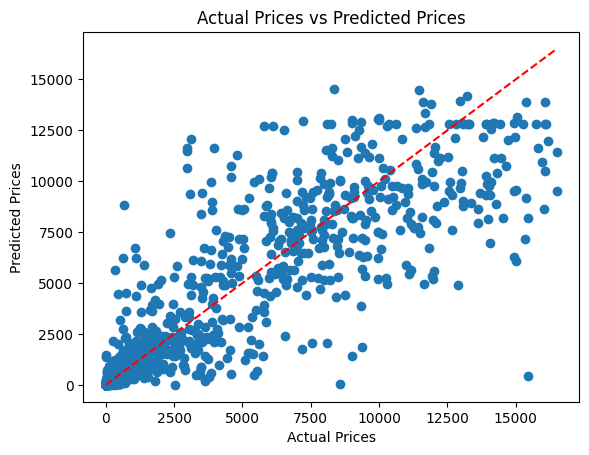

In [24]:
# Graph
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)

plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')